# **AP155 Lab Assignment** 
## Module 6: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 50 points each).

_Due Date_: **5PM of December 21 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely\
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (50 pts.; 50/50 for code & discussion) 
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(15 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(10 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(15 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text. 

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(10 pts.)*

**Solution**

First is we import all the necessary packages for this problem.

In [25]:
import numpy as np
from numpy import zeros, exp, empty, linspace, cos, sin, pi
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from banded import banded
from dcst import dst, idst


**3.1** Frist thing is we define the constants, parameters, matrix entries, and the initial wavefunction at $t=0$ that is given above.

In [33]:
# Defining the constants and parameters
h = 1e-18
hbar = 1.0546e-34
L = 1e-8
M = 9.109e-31
N = 1000 
sigma = 1e-10
k = 5e10
a = L/N
x0 = L/2
psi = zeros(N+1,complex)
x_val = linspace(0,L,N+1)

# Defining the matrix entries
a1 = 1 + h*hbar/2/M/a**2*1j
a2 = -h*hbar*1j/4/M/a**2
b1 =  1 - h*hbar/2/M/a**2*1j
b2 =  h*hbar*1j/4/M/a**2

# Defining the initial wavefunction
def psi0(x_val):
	return exp(-(x_val-x0)**2/2/sigma**2)*exp(1j*k*x_val)

psi[:] = psi0(x_val)
psi[[0,N]]=0

**3.2** Next is we solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$ using the banded function, which will give us the new value of $\psi$.

In [28]:
# Intializing the matrix A
A = empty((3,N),complex)
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

# Intializing the matrix v
v = b1 * psi[1:N] + b2*psi[2:N+1]+ b2* psi[0:N-1]

# Using banded to solve for x
x = banded(A,v,1,1)


Then we plot single step of the calculation, just to check if our graph is behaving as we're expecting it to.

Text(0.5, 1.0, 'Real part of the wavefunction')

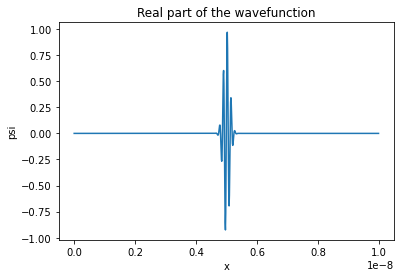

In [29]:
# Plotting while customing the size of the arrays
plt.plot(x_val[0:999],np.real(x[0:1000]))
plt.xlabel("x")
plt.ylabel("psi")
plt.title("Real part of the wavefunction")

**3.3** Now, we extend our program to perform repeated steps over a range of 500 and hence solve for $\psi$. Then, we plot the real part of the wavefunction.

Text(0.5, 1.0, 'Real part of the wavefunction')

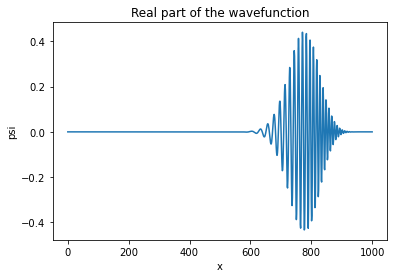

In [24]:
# Extending the program
for i in range(500):
    v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
    psi[1:N] = banded(A,v,1,1)

# Plotting the real part of the wavefunction at the given range
plt.plot(np.real(psi))
plt.xlabel("x")
plt.ylabel("psi")
plt.title("Real part of the wavefunction")

**3.4**  Lastly, we make an animation of the wavefunction over time using matplotlib's animation feature.

In [ ]:
xgrid = np.linspace(0, L, N+1)
img = []
frames = []
fig = plt.figure()
for i in range(0,5001):
    psi[1:N] = banded(A,v,1,1)
    v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])

    if i%10 == 1:
        frames.append(plt.plot(xgrid, np.real(psi), color = 'steelblue'))
        plt.xlabel("x")
        plt.ylabel("psi")
anim = animation.ArtistAnimation(fig, frames, interval = 50, blit=True, repeat_delay = 1000)

writergif = animation.PillowWriter(fps = 30)
anim.save('Problem 1 animation.gif', writer= writergif)

Then display the animation.

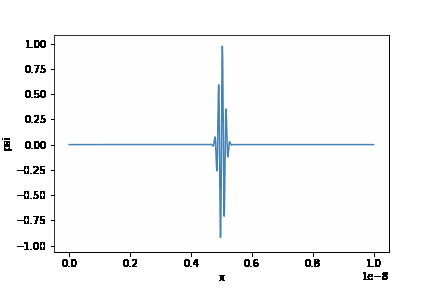

In [25]:
from IPython.display import Image
Image(filename="Problem 1 animation.gif")

From the animation, we can observe that the real part of thr wavefunction evolves smoothly, which means that the solution to the Schroedinger equation stays well-behaved through time.

### PROBLEM 2 (50 pts.; 50/50 for code & discussion)

**The Schrodinger equation and the spectral method**

_Refer to Exercise 9.9 in the Newman text._ In this problem, you will use the spectral method to solve the time-dependent Schodinger equation for the same system as in Problem 1, a single particle in one dimension in a box of length $L$ with impenetrable walls. 

To perform the fast transforms needed for this problem, you can use the scipy $\tt fftpack$ package's discrete sine transform $\tt dst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html)) and inverse discrete sine transform $\tt idst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idst.html)). Alternatively, you can use the corresponding functions in the $\tt dcst$ package in Appendix E of the Newman text. 

1. Calculate the values of the coefficients $b_k$ which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i \eta_k$· Divide the box into $N = 1000$ slices and create two arrays containing the real and imaginary parts of $\psi(x_n,0)$ at each grid point. Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k=1$...$N-1$. *(15 pts.)*

2. Putting $b_k = \alpha_k +i \eta_k$ in the solution above and taking the real part we get $ {\rm Re}\ \psi(x_n, t) $ equals
$$\frac{1}{N} \sum_{k=1}^{N-1} \left[\alpha_k \cos\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right) - \eta_k \sin\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right)\right]\sin\left(\frac{\pi kn}{N}\right)$$
for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. 

   Calculate the real part of the wavefunction $\psi(x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function. *(10 pts.)* 
   
3. Test your program by making a graph of the wavefunction at time $t = 10^{-16}$ s. *(10 pts.)*

4. Make an animation of the wavefunction over time, similar to that described in part (4) of Problem 1 above. A suitable time interval for each frame of the animation is about $10^{-18}$ s. Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(15 pts.)*


**Solution**

Again, first is we input all the necessary packages for this problem.

In [1]:
from numpy import cos, sin, empty, exp, pi
from dcst import dst, idst

**3.1** From the time-independent Schroedinger equation, we get the general solution
$$\psi(x_n,t) = \dfrac{1}{N}\sum_{k=1}^{N-1}b_k \sin\left(\dfrac{\pi k n}{N}\right)exp\left(i\dfrac{\pi^2 hk^2}{2m_e L^2}\right)$$
At time $t=0$, the initial state of the wavefunction is of the form
$$\psi(x,0)=exp\left(-\dfrac{(x-x_0)^2}{2\sigma^2}\right)e^{i\kappa x}$$ 

So first, we define the parameters and then initialize the function at its initial state where $t = 0$ by defining the real and imaginary parts of the coefficient $b_k$. Accordingly, we also create an array for each part.

In [16]:
# Defining the parameters
x0 = L/2     
sigma = 1e-10     
kappa = 5e10

# Initialing wavefunction at t=0
def psi0(x):     
    real = exp(-((x-x0)**2) / (2*sigma**2))*cos(kappa*x)
    imag = exp(-((x-x0)**2) / (2*sigma**2))*sin(kappa*x)
    return real, imag 

# Initializing real and imaginary arrays 
realpart = empty(N+1, float)
imagpart = empty(N+1, float)

# Filling arrays with real or imaginary values 
for i in range(0, N+1): 
    realpart[i], imagpart[i] = psi0(i*a)

Next, we take an array of $N$ real number and return the discreter sine transfroms of another array of numbers by using the dst function from the dcst program.

In [ ]:
# Calculating discrete sine transform on each array 
alpha = dst(realpart)      
eta = dst(imagpart)       

**3.2** Then, we calculate the real part of the wavefunction $\psi(x,t)$ using the formula for the real part that is given above and the inverse discrete sine transfrom or idst function of the dcst program.

In [17]:
# Defining a function that inputs time 
def realpsicoeffs(t):
    realpart = empty(N+1, float)
    for i in range(0, N+1): 
        realpart[i] = alpha[i]*cos(((pi**2*hbar*i**2)/(2*M*L**2))*t) - eta[i]*sin(((pi**2*hbar*i**2)/(2*M*L**2))*t)
    
    # Using the inverse dst to get the real part of psi
    inversed = idst(realpart)
    return inversed

**3.3** To test our program, we graph the wavefunction at $t=10^{-16}$ s. We also graph it at different values of $t$ to observe its behaviour.

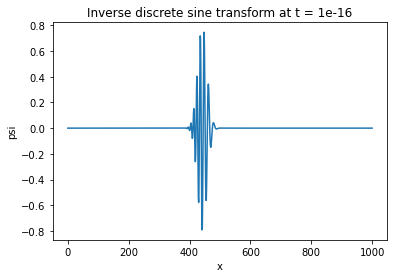

In [18]:
t1 = 1e-16 # seconds 

plt.plot(realpsicoeffs(t1), label = "Real part wavefunction")
    
plt.xlabel("x")
plt.ylabel("psi")
plt.title("Inverse discrete sine transform at t = 1e-16")
plt.show()


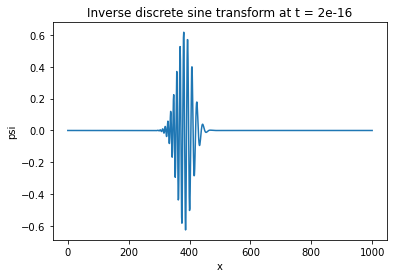

In [11]:
t2 = 2e-16  # seconds 

plt.plot(realpsicoeffs(t2), label = "Real part wavefunction")

plt.title("Inverse discrete sine transform at t = 2e-16")  
plt.xlabel("x")
plt.ylabel("psi")
plt.show()

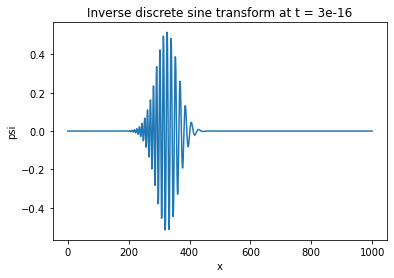

In [12]:
t3 = 3e-16  # seconds 

plt.plot(realpsicoeffs(t3), label = "Real part wavefunction")

plt.title("Inverse discrete sine transform at t = 3e-16") 
plt.xlabel("x")
plt.ylabel("psi")
plt.show()

**3.4** Lastly, we make an animation of the wavefunction over time, similar to what we did in problem one, with a suitable time step $h$, using matplotlib's animation feature.

In [ ]:
# Defining the variables
h = 1e-16
x_val = np.arange(0, 100e-16, h)
xgrid = np.linspace(0, L, N+1)


img = []
frames = []
fig = plt.figure()

# Stitching the plots at different time intervals
for t in x_val:
    frames.append(plt.plot(xgrid, realpsicoeffs(t), color = 'steelblue'))
    plt.xlabel("x")
    plt.ylabel("psi")

# Using matplotlib's ArtistAnimation
anim2 = animation.ArtistAnimation(fig, frames, interval = 50, blit=True, repeat_delay = 1000)
writergif = animation.PillowWriter(fps = 10)

# Saving the animation as gif
anim2.save('Problem 2 animation.gif', writer= writergif)

Then display the animation.

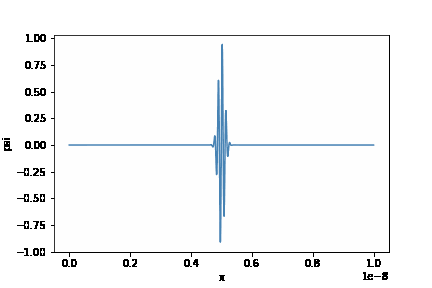

In [15]:
from IPython.display import Image
Image(filename="Problem 2 animation.gif")

From the animation, we can observe that the real part of thr wavefunction also evolves smoothly. Which means that using the spectral method, the solution to the Schroedinger equation stays well-behaved through time.